In [27]:

#importing dataset

import pandas as pd # importing pandas library
data = pd.read_csv('CC GENERAL.csv') # loading the data



#preprocessing
data.isnull().sum()
data = data.drop('CUST_ID', 1)#dropping id
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [34]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [35]:

agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


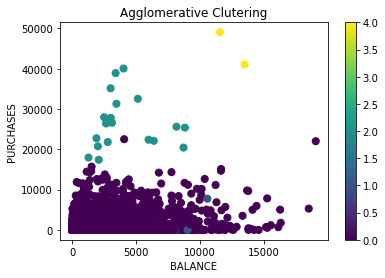

In [30]:
#plotting clusters
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In [31]:
#purple:the amount left in their account is low  and they don't affect a lot of purchases 
#green:the amount left in their account is median and they affect medium purchases
#yellow:the amount of their purchases is hight and they affect hight purchases

In [ ]:
#Dendogram
#import matplotlib.pyplot as plt
#import scipy.cluster.hierarchy as shc
#plt.figure(figsize=(5))
#plt.title("Customer Dendrograms")
#dend=shc.dendrogram(shc.linkage(data, method="complete"))
#dend.show

In [32]:
#to try different K values , we must use k-means clustering
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [41]:
labels=pd.DataFrame(kmeans.labels_)
labels


,0
0,2
1,3
2,0
3,0
4,2
...,...
8945,2
8946,2
8947,2
8948,2


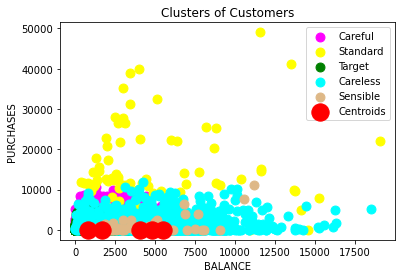

In [42]:
#plotting the clusters
plt.scatter(data["BALANCE"][data.label == 0],          
            data["PURCHASES"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][data.label == 1],
           data["PURCHASES"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][data.label == 2],
           data["PURCHASES"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["BALANCE"][data.label == 3], 
           data["PURCHASES"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["BALANCE"][data.label == 4], 
           data["PURCHASES"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [43]:
#there is slight differences at the edges of each cluster